# Neural Encoding Simulation Toolkit | In silico EEG Data Tutorial

In this tutorial you will familiarize with the [Neural Encoding Simulation Toolkit (NEST)][nest], consisting of trained encoding models of the brain that you can use to generate of in silico neural responses to stimuli of your choice. Through the [`NEST` Python package][github], you will use these trained encoding models to generate EEG responses to images.

For more information on NEST refer to the [documentation][documentation]. The code used to create NEST, along with its utility functions, is available on [GitHub][github].

You can run this tutorial either on [Colab][colab], or on [Jupyter Notebook][jupyter]. If you experience problems with the code, please get in touch with Ale (alessandro.gifford@gmail.com).

If you use the code and/or data from this tutorial, please cite:

> *Gifford AT, Bersch D, Roig G, Cichy RM. 2025. The Neural Encoding Simulation Toolkit. In preparation. https://github.com/gifale95/NEST*

[nest]: https://www.alegifford.com/projects/nest/
[documentation]: https://neural-encoding-simulation-toolkit.readthedocs.io/en/latest/index.html
[github]: https://github.com/gifale95/NEST
[colab]: https://drive.google.com/file/d/1uF5nr1pyg0_my3gULj3w5y0nuq5gZjhL/view?usp=sharing
[jupyter]: https://github.com/gifale95/NEST/blob/main/tutorials/nest_eeg_tutorial.ipynb

# 0 | Configuration

Note that in sections `0.1 Install and import the necessary Python libraries` and `0.2 Access NEST` you will have to run different code cells based on whether you are running the tutorial on Colab or on Jupyter Notebook. An `if statement` will take care of this. You only need to select `'colab'` or `'jupyter_notebook'` for the `platform` variable below.

In [ ]:
# Select platform
platform = "colab" # @param ["colab", "jupyter_notebook"]

## 0.1 | Install and import the necessary Python libraries

### 0.1.1 | Install libraries, Google Colab

If you are running the tutorial on Google Colab, you just need to install the [NEST Python package][nest_git].

[nest_git]: https://github.com/gifale95/NEST

In [ ]:
!pip install -U git+https://github.com/gifale95/NEST.git

# Fix urllib3 version first to avoid AWS CLI compatibility issues
!pip uninstall -y urllib3
!pip install urllib3==1.26.15

# Install AWS client
!apt-get update -qq
!apt-get install -y -qq awscli

  Cloning https://github.com/gifale95/NEST.git (to revision development) to /tmp/pip-req-build-qf5dnv29
  Running command git clone --filter=blob:none --quiet https://github.com/gifale95/NEST.git /tmp/pip-req-build-qf5dnv29
  Running command git checkout -b development --track origin/development
  Switched to a new branch 'development'
  Branch 'development' set up to track remote branch 'development' from 'origin'.
  Resolved https://github.com/gifale95/NEST.git to commit 17ccb38f307ee0048deeb11fd192b6efad75e157
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

### 0.1.2 | Install libraries, Jupyter Notebook

If you are running the tutorial on Jupyter Notebook, you need to install the following libraries before running the tutorial:

[h5py][h5py], [jupyter][jupyter], [matplotlib][matplotlib], [nest][nest_git], [nibabel][nibabel], [numpy][numpy], [pillow][pil], [torchvision][torchvision], [tqdm][tqdm].

[h5py]: https://docs.h5py.org/en/stable/
[jupyter]: https://jupyter.org/
[matplotlib]: https://matplotlib.org/stable/index.html
[nest_git]: https://github.com/gifale95/NEST
[nibabel]: https://nipy.org/nibabel/
[numpy]: https://numpy.org/
[pil]: https://pypi.org/project/pillow/
[torchvision]: https://pytorch.org/vision/stable/index.html
[tqdm]: https://tqdm.github.io/

### 0.1.3 | Import the libraries

Once you have installed all necessary libraries, import them with the following code.

In [ ]:
import h5py
import matplotlib
from matplotlib import pyplot as plt
from nest import NEST
import nibabel as nib
import numpy as np
import os
from PIL import Image
import torchvision
from torchvision import transforms as trn
from tqdm import tqdm

## 0.2 | Access NEST

### 0.2.1 | Access NEST on Google Colab or Jupyter Notebook

If you are running this notebook in **Colab** or **Jupyter**, the recommended way to access NEST is to download the full dataset from the public AWS S3 bucket provided by the [AWS Open Data Registry](https://registry.opendata.aws/neural_encoding_simulation_toolkit/).

The following code downloads the full contents of the `neural-encoding-simulation-toolkit` bucket into a local folder of the same name. This method works on both Colab and Jupyter environments.

> Note: This may take several minutes (~3min) to complete, depending on your internet connection. If you only need specific subfolders, you can modify the S3 path in the aws s3 sync command accordingly.

In [ ]:
# Create directory for NEST data
nest_dir = 'neural-encoding-simulation-toolkit'
os.makedirs(nest_dir, exist_ok=True)

# Download NEST data from AWS S3
print(f"Downloading NEST data into: {nest_dir}")
!aws s3 sync --no-sign-request s3://neural-encoding-simulation-toolkit {nest_dir}
print("Download completed!")

nest_dir = '/content/neural-encoding-simulation-toolkit'

download: s3://neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-C.png to neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-C.png
download: s3://neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-F.png to neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-F.png
download: s3://neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-O.png to neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accu

---
---

# 1 | Initialize NEST

## 1.1 | Create the NEST object

To use the NEST package, you first need to create a `NEST` object, by providing the path to the Neural Encoding Simulation Toolkit directory. This object will be the instance through which you can generate in silico neural responses.

In [ ]:
# Initialize the NEST object with the path to the toolkit directory
nest_object = NEST(nest_dir)

## 1.2 | Browse the available encoding models

The `list_models()` method lists the encoding models that are available in NEST. NEST contains several encoding models, defined by the following model ID naming convention:

`{modality}-{dataset}-{model}`

where

* **`modality`:** The neural recording recording modality on which the encoding model was trained.
* **`dataset`:** The neural dataset on which the encoding model was trained.
* **`model`:** The type of encoding model used.

In [ ]:
# List all available models and their versions
available_models = nest_object.list_models()
print(f"Available models: {available_models}")

Available models: ['fmri-nsd-fwrf', 'fmri-nsd_fsaverage-vit_b_32', 'eeg-things_eeg_2-vit_b_32']


You can also view the modalities and datasets in a more structured format:

In [ ]:
# Get a hierarchical view of available models by modality and dataset
catalog = nest_object.get_model_catalog(print_format=True)
print(f"Model Catalog as Dict: {catalog}")

Available Modalities and Datasets:
• EEG
  └─ things_eeg_2

• FMRI
  └─ nsd
  └─ nsd_fsaverage

Model Catalog as Dict: {'fMRI': ['nsd', 'nsd_fsaverage'], 'EEG': ['things_eeg_2']}


The `print_format=True` parameter displays a nicely formatted hierarchical view, making it easy to browse the available encoding models.

<font color='red'><b>NOTE:</b></font> For a list of all available encoding model, please see the [documentation](https://neural-encoding-simulation-toolkit.readthedocs.io/en/latest/models/overview.html).

## 1.3 | Get a detailed model information for the selected models

For the purpose of this tutorial, you will use the encoding model with ID `eeg-things_eeg_2-vit_b_32`, a vision-transformer-based encoding model trained on EEG responses from THINGS EEG2 ([Gifford et al., 2022](https://doi.org/10.1016/j.neuroimage.2022.119754)).

With the `describe()` you can get detailed information about this model and how to use it, including:

* **Basic Information:** Details about the modality (EEG), dataset (THINGS EEG2), and encoding model (vit_b_32).
* **Description:** How the model works and what it does.
* **Input Requirements:** Format specifications for input stimuli (dimensions, type, etc.).
* **Output Format:** The structure and meaning of the model's in silico neural predictions.
* **Parameters:** Required and optional arguments for the model's functions.
* **Performance Information:** Directory where to find the encodind model's prediction accuracy plots.
* **Usage Examples:** Code snippets showing how to use the model.

This information will help you understand how to properly set up and use the model in the following sections.

<font color='red'><b>NOTE:</b></font> You can also view this information on the model in the [documentation](https://neural-encoding-simulation-toolkit.readthedocs.io/en/latest/models/overview.html).

In [ ]:
# Get comprehensive information about the EEG model
model_id = "eeg-things_eeg_2-vit_b_32"
model_info = nest_object.describe(model_id)

🧠 Model: eeg-things_eeg_2-vit_b_32

Modality: EEG
Training dataset: THINGS EEG2
Creator: Alessandro Gifford

📋 Description:
These encoding models consist in a linear mapping (through linear regression) of
vision transformer (Dosovitskiy et al., 2020) image features onto EEG responses.
Prior to mapping onto EEG responses, the image features have been downsampled to
250 principal components using principal component analysis.  The encoding
models were trained on THINGS EEG2 (Gifford et al., 2022), 63-channel EEG
responses of 10 subjects to over 16,740 images from the THINGS initiative
(Hebart et al., 2019).  **Preprocessing**. During preprocessing the 63-channel
raw EEG data was filtered between 0.03 Hz and 100 Hz; epoched from -100 ms to
+600 ms with respect to stimulus onset; transformed using current source density
transform; downsampled to 200 Hz resulting in 140 times points per epoch (one
every 5 ms); baseline corrected at each channel using the mean of the pre-
stimulus interval. 

# 2 | Generate in silico EEG responses to images

Now you will use NEST to generate in silico EEG responses to images.

## 2.1 | Load and prepare the images for which the in silico EEG responses are generated

The `eeg-things_eeg_2-vit_b_32` encoding model expects input images in a specific format: a 4D numpy array with shape (Batch size × 3 RGB Channels × Width × Height) and integer values in the range [0, 255]. Because the images must also be of square size (equal width and height), you will center crop them during loading.

In [ ]:
images_dir = os.path.join(nest_dir, 'nest_tutorials', 'tutorial_images')
images_list = os.listdir(images_dir)
images_list.sort()

images = []
for img in tqdm(images_list):
    img_dir = os.path.join(images_dir, img)
    img = Image.open(img_dir).convert('RGB')
    # Center crop the images to square format, and resize them
    transform = trn.Compose([
        trn.CenterCrop(min(img.size)),
        trn.Resize((227,227))
    ])
    img = transform(img)
    img = np.asarray(img)
    img = img.transpose(2,0,1)
    images.append(img)
images = np.asarray(images)

# Print the images dimensions
print('\n\nImages shape:')
print(images.shape)
print('(Batch size × 3 RGB Channels x Width x Height)')

100%|██████████| 100/100 [00:00<00:00, 115.77it/s]



Images shape:
(100, 3, 227, 227)
(Batch size × 3 RGB Channels x Width x Height)


Here you can visualize one of the loaded images of your choice.

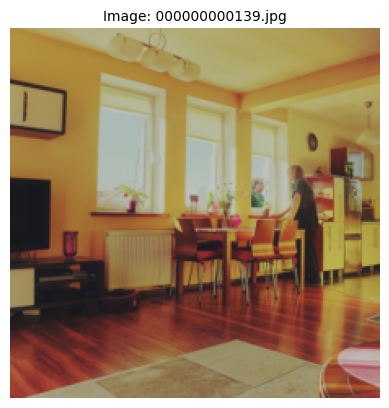

In [ ]:
# Choose the image you would like to visualize
img_num = 0 # @param {type:"slider", min:0, max:99, step:1}

# Plot the image
plt.figure()
plt.axis('off')
plt.imshow(images[img_num].transpose(1,2,0))
plt.title('Image: ' + images_list[img_num], fontsize=10);

## 2.2 | Generate the in silico EEG responses to images

Now you will use NEST's encoding models to generate the in silico EEG responses to these images, following two steps.

First, you will load a the `eeg-things_eeg_2-vit_b_32` encoding model with the `get_encoding_model()` method, based on the subject and ROI of your choice.

In [ ]:
# Choose the model ID
model_id = "eeg-things_eeg_2-vit_b_32"

# Select the Subject number
subject = 1 # @param ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"] {type:"raw", allow-input: true}
print('Subject: ' + str(subject))

# Step 1: Load the encoding model for our chosen subjec
eeg_encoding_model = nest_object.get_encoding_model(
    model_id=model_id,
    subject=subject,
    device='auto'
)

Subject: 1


Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /root/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth
100%|██████████| 337M/337M [00:02<00:00, 158MB/s]


Model loaded on cuda for subject 1


Second, you will use this model to generate the in silico EEG responses to images with the `encode()` method.

In [ ]:
# Step 2: Generate in silico EEG responses for our images
insilico_eeg, insilico_eeg_metadata = nest_object.encode(
    eeg_encoding_model,
    images,
    return_metadata=True
)

Encoding EEG responses: 100%|██████████| 1/1 [00:01<00:00,  1.92s/it, Encoded images=100, Total images=100]


Finally, you can examine the shape of the in silico fMRI responses.

In [ ]:
# Print the in silico EEG responses dimensions
print('In silico EEG responses shape:')
print(insilico_eeg.shape)
print('(Images x Repetitions x Channels x Time points)')

In silico EEG responses shape:
(100, 4, 63, 140)
(Images x Repetitions x Channels x Time points)


# 3 | In silico EEG responses metadata

The in silico EEG responses come with useful metadata. You can access this metadata either by setting `return_metadata=True` in the `encode()` function (as we did above), or by using the `get_model_metadata()` method on the nest object, including the specified parameters:

In [ ]:
# You can also limit the metadata similar to how you load the model
insilico_eeg_metadata = nest_object.get_model_metadata("eeg-things_eeg_2-vit_b_32", subject=subject)

The metadata is a dictionary with two main sections:

* **`eeg`:** Information on the EEG data used to train the encoding models
* **`encoding_models`:** Information on the trained models themselves

## 3.1 | EEG metadata

Here you will familiarize with the metadata from the `eeg` key, that is, metadata relative to the EEG responses used to train the encoding models.

### 3.1.1 | EEG channels

The `ch_names` variable is a list of length (Channels), where each list element indicates the name of a given EEG channel.

In [ ]:
# Print the EEG channels
print('\nEEG channels:')
for c, chan in enumerate(insilico_eeg_metadata['eeg']['ch_names']):
    print(c, chan)


EEG channels:
0 Fp1
1 F3
2 F7
3 FT9
4 FC5
5 FC1
6 C3
7 T7
8 TP9
9 CP5
10 CP1
11 Pz
12 P3
13 P7
14 O1
15 Oz
16 O2
17 P4
18 P8
19 TP10
20 CP6
21 CP2
22 Cz
23 C4
24 T8
25 FT10
26 FC6
27 FC2
28 F4
29 F8
30 Fp2
31 AF7
32 AF3
33 AFz
34 F1
35 F5
36 FT7
37 FC3
38 FCz
39 C1
40 C5
41 TP7
42 CP3
43 P1
44 P5
45 PO7
46 PO3
47 POz
48 PO4
49 PO8
50 P6
51 P2
52 CPz
53 CP4
54 TP8
55 C6
56 C2
57 FC4
58 FT8
59 F6
60 F2
61 AF4
62 AF8


### 3.1.2 | EEG time points

The `time` variable is a 1-D array of length (Time points), where each vector component indicates the timing of a given EEG time point, in seconds, with respect to stimulus onset.

In [ ]:
# Print the EEG time points
print('\nEEG time points (in seconds):')
for t, time in enumerate(insilico_eeg_metadata['eeg']['times']):
    print(t, np.round(time, decimals=3))


EEG time points (in seconds):
0 -0.1
1 -0.095
2 -0.09
3 -0.085
4 -0.08
5 -0.075
6 -0.07
7 -0.065
8 -0.06
9 -0.055
10 -0.05
11 -0.045
12 -0.04
13 -0.035
14 -0.03
15 -0.025
16 -0.02
17 -0.015
18 -0.01
19 -0.005
20 0.0
21 0.005
22 0.01
23 0.015
24 0.02
25 0.025
26 0.03
27 0.035
28 0.04
29 0.045
30 0.05
31 0.055
32 0.06
33 0.065
34 0.07
35 0.075
36 0.08
37 0.085
38 0.09
39 0.095
40 0.1
41 0.105
42 0.11
43 0.115
44 0.12
45 0.125
46 0.13
47 0.135
48 0.14
49 0.145
50 0.15
51 0.155
52 0.16
53 0.165
54 0.17
55 0.175
56 0.18
57 0.185
58 0.19
59 0.195
60 0.2
61 0.205
62 0.21
63 0.215
64 0.22
65 0.225
66 0.23
67 0.235
68 0.24
69 0.245
70 0.25
71 0.255
72 0.26
73 0.265
74 0.27
75 0.275
76 0.28
77 0.285
78 0.29
79 0.295
80 0.3
81 0.305
82 0.31
83 0.315
84 0.32
85 0.325
86 0.33
87 0.335
88 0.34
89 0.345
90 0.35
91 0.355
92 0.36
93 0.365
94 0.37
95 0.375
96 0.38
97 0.385
98 0.39
99 0.395
100 0.4
101 0.405
102 0.41
103 0.415
104 0.42
105 0.425
106 0.43
107 0.435
108 0.44
109 0.445
110 0.45
111 0.455
1

## 3.2 | Encoding models metadata

Now you will familiarize with the metadata from the `encoding_models` key, that is, metadata relative to the trained EEG encoding models.

### 3.2.1 | Encoding models encoding accuracy

For each THINGS EEG2 subject, we trained the encoding models using 16,540 images, and tested them on 200 images. We used the trained encoding models to generate the in silico EEG responses for the 200 test images, and compared these in silico EEG responses to the ground truth (real) EEG responses through a Pearson correlation. We correlated ground-truth and in silico EEG responses independently for each EEG channel and time point (across the 200 test images), resulting in one encoding accuracy score for each channel and time point.

Since EEG channels can be grouped based on their position (e.g., occipital, parietal, temporal, central, frontal), here you can choose whether to plot the encoding accuracy for all of the EEG channels, or only for the ones coming from a specific channel group.

In [ ]:
# Choose the EEG channels to keep
kept_channels = "occipital" # @param ["occipital", "parietal", "temporal", "central", "frontal", "all"] {allow-input: true}

# Channels selection
if kept_channels != 'all':
	ch_names_kept = []
	idx_ch = []
	for c, chan in enumerate(insilico_eeg_metadata['eeg']['ch_names']):
		if kept_channels[0].upper() in chan:
			ch_names_kept.append(chan)
			idx_ch.append(c)
	idx_ch = np.asarray(idx_ch)
elif kept_channels == 'all':
	ch_names_kept = insilico_eeg_metadata['eeg']['ch_names']
	idx_ch = np.arange(0, len(insilico_eeg_metadata['eeg']['ch_names']))

print('\nKept EEG channels:')
for c, chan in enumerate(ch_names_kept):
    print(c, chan)


Kept EEG channels:
0 O1
1 Oz
2 O2
3 PO7
4 PO3
5 POz
6 PO4
7 PO8


Now you will plot the encoding accuracy averaged across the EEG channels from the chosen channel group, against the (split-half) noise ceiling lower and upper bounds (denoted by the gray region).

Since there are 4 repetitions (i.e., instances) of in silico EEG responses you will plot the correlation score of the ground truth EEG response against each single in silico EEG repetition (black dashed lines), as well as the correlation score of the ground truth EEG response against the average over the 4 in silico EEG repetitions (pink solid line).

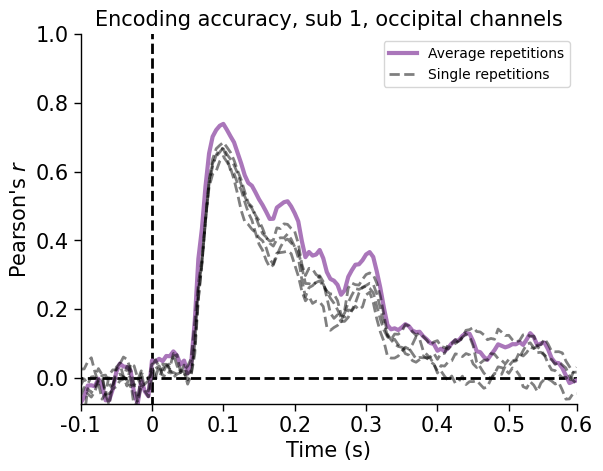

In [ ]:
# Get the encoding accuracy results
encoding_acc_avg_rep = np.mean(insilico_eeg_metadata['encoding_models']\
    ['correlation_averaged_repetitions'][idx_ch], 0)
encoding_acc_single_rep = np.mean(insilico_eeg_metadata['encoding_models']\
    ['correlation_single_repetitions'][:,idx_ch], 1)
times = insilico_eeg_metadata['eeg']['times']

# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(170/255, 118/255, 186/255)]
color_noise_ceiling = (150/255, 150/255, 150/255)

# Plot the channel-average encoding accuracy
plt.plot()
plt.plot([-10, 10], [0, 0], 'k--', [0, 0], [100, -100], 'k--', linewidth=2,
    label='_nolegend_')
plt.plot(times, encoding_acc_avg_rep, color=colors[0], linewidth=3,
    label='Average repetitions')
for r, res in enumerate(encoding_acc_single_rep):
    if r == 0:
        plt.plot(times, res, '--', color='k', linewidth=2, alpha=0.5,
            label='Single repetitions')
    else:
        plt.plot(times, res, '--', color='k', linewidth=2, alpha=0.5,
            label='_nolegend_')
plt.ylabel('Pearson\'s $r$', fontsize=fontsize)
plt.ylim(bottom=-.075, top=1)
plt.xlabel('Time (s)', fontsize=fontsize)
xticks = [-0.1, 0, .1, .2, .3, .4, .5, times[-1]]
xlabels = [-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
plt.xticks(ticks=xticks, labels=xlabels)
plt.xlim(left=min(times), right=max(times));
title = 'Encoding accuracy, sub ' +str(subject) + ', ' + kept_channels + \
    ' channels'
plt.title(title, fontsize=fontsize)
plt.legend(fontsize=fontsize-5);